## The TwoPlus Earbuds Problem

### Group 10: Dean Criscitiello, Daylyn Mosher, Tom Lyster, Amaarah Rahman, Franklin Tan

#### Importing Numpy and Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Function for random demand - Normal Distribution

In [2]:
def generate_random_demand_normal(mean, stddev, size):
    """
    Generates a random sample of demand instances from a normal (Gaussian) distribution.
    """
    demand = np.random.normal(mean,stddev,size)
    for i in range(size):
        demand[i] = round(demand[i],4)
    return demand

# print(generate_random_demand_normal(150,20,1000))

#### Function for random demand - Uniform Distribution

In [3]:
def generate_random_demand_uniform(low, high, size):
    """
    Generates a random sample of demand instances from a uniform distribution.
    """
    demand = np.random.uniform(low,high,size)
    for i in range(size):
        demand[i] = round(demand[i],4)
    return demand

# print(generate_random_demand_uniform(100,200,1000))

#### Iterates through the demand list and calculates the average at a specific manufacture level

In [4]:
def calc_optimal_production(mean, stddev, size, retail_price, production_cost, disposal_cost, units_manufactured, dist, low, high):
    """
    Uses inputs to calculate the optimal production level given randomly generated demand
    """
    
    # User has to specify if they want a normal or uniform demand distribution
    if dist == "n":
        demand = generate_random_demand_normal(mean, stddev, size)
    elif dist == "u":
        demand = generate_random_demand_uniform(low, high, size)
        
    profit = retail_price - production_cost
    profit_dict = {}

    for x in range(size):
        # Scenario where too many units are manufactured/higher than demand and results in loss from unsold units + disposal cost
        if demand[x] < units_manufactured:
            loss_units = units_manufactured - demand[x]
            profit_dict[demand[x]] = (demand[x] * profit) - (loss_units * (production_cost + disposal_cost))

        # Scenario where too little units are manufactured/lower than demand and results in loss profits from customers that want to buy
        elif demand[x] > units_manufactured:
            loss_customers = demand[x] - units_manufactured
            profit_dict[demand[x]] = (units_manufactured * profit) - (loss_customers * (retail_price - production_cost))

        else:
        # Scenario where demand and units manufactured are equal
            profit_dict[demand[x]] = (units_manufactured * profit)
    # print(profit_dict) # Checking what the profit dictionary looks like
    print(str(units_manufactured) + " units manufactured")

    # Calculate mean profit of the production level
    sum = 0
    for val in profit_dict.values():
        sum += val
    result = round(sum / len(profit_dict),2)
    print("AVG: " + str(result))

    # Calculate standard deviation of the profit
    profit_list = []
    for val in profit_dict.values():
        profit_list.append(val)
    std = round(np.std(profit_list),2)
    print("STD: " + str(std))
    print("===========================")
    return result


#### Outputs a recommendation to the user as well as a scatterplot after running a specifed range of simulations

In [5]:
def run_simulation(min_lvl, max_lvl, mean, stddev, size, retail_price, production_cost, disposal_cost, dist, low, high):
    """
    Simulation run - finds optimal production level by calculating average profit given a demand at various manufacturing levels
    Plots results on a graph and prints the optimal number of units to manufacture.
    """
    x_manufacture_level = []
    y_profit = []
    for i in range(min_lvl, max_lvl):
        x_manufacture_level.append(i)
        y_profit.append(calc_optimal_production(mean, stddev, size, retail_price, production_cost, disposal_cost, i, dist, low, high))

    # Print out the recommendation to the user
    optimal_value_profit = max(y_profit)
    optimal_number = x_manufacture_level[y_profit.index(optimal_value_profit)]
    print("Recommendation: " + str(optimal_number) + " units yields an average profit of " + "$" + str(optimal_value_profit))

    # Plotting using Matplotlib
    plt.title("Manufacturing Level Simulation", loc = 'left', fontsize = 20)
    plt.xlabel('Manufacture Level')
    plt.ylabel('Profit')
    plt.xticks(np.arange(min(x_manufacture_level), max(x_manufacture_level)+1, 10.0))
    sctr = plt.scatter(x_manufacture_level, y_profit, c=y_profit, cmap='RdYlBu')
    plt.colorbar(sctr, format='$%d')
    plt.grid()
    plt.show()

#### Allows user input to be taken to run the functions

In [6]:
def run_program():
    min_lvl = int(input("Enter the lowest manufacturing level you want to simulate: "))
    max_lvl = int(input("Enter the highest manufacturing level you want to simulate: "))
    mean = float(input("Enter the mean: "))
    stddev = float(input("Enter the standard deviation: "))
    size = int(input("Enter the number of demand simulations you want to run: "))
    retail_price = float(input("Enter the retail price: "))
    production_cost = float(input("Enter the production cost: "))
    disposal_cost = float(input("Enter the disposal cost: "))
    dist = input("Enter the 'n' for normal distribution or 'u' for uniform distribution: ")
    low = int(input("Enter the low only for uniform distribution. Enter 0 for normal distribution:  "))
    high = int(input("Enter the high only for uniform distribution. Enter 0 for normal distribution: "))

    run_simulation(min_lvl, max_lvl, mean, stddev, size, retail_price, production_cost, disposal_cost, dist, low, high)

##### Running simulation with normal distribution - How many earbuds will you manufacture and why? Please restrict your answer to at most 50 words.

Enter the lowest manufacturing level you want to simulate: 140
Enter the highest manufacturing level you want to simulate: 200
Enter the mean: 150
Enter the standard deviation: 20
Enter the number of demand simulations you want to run: 1000
Enter the retail price: 150
Enter the production cost: 28.5
Enter the disposal cost: 8.5
Enter the 'n' for normal distribution or 'u' for uniform distribution: n
Enter the low only for uniform distribution. Enter 0 for normal distribution:  0
Enter the high only for uniform distribution. Enter 0 for normal distribution: 0
140 units manufactured
AVG: 14630.2
STD: 1738.81
141 units manufactured
AVG: 14772.46
STD: 1709.24
142 units manufactured
AVG: 14967.46
STD: 1689.16
143 units manufactured
AVG: 15153.4
STD: 1657.44
144 units manufactured
AVG: 15233.43
STD: 1692.54
145 units manufactured
AVG: 15356.08
STD: 1736.01
146 units manufactured
AVG: 15440.11
STD: 1704.41
147 units manufactured
AVG: 15619.96
STD: 1664.65
148 units manufactured
AVG: 15781.5
S

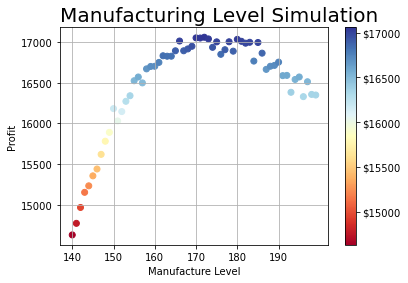

In [18]:
run_program()

##### Running simulation with normal distribution - Your policy analysts report that there is a 50% chance of the government imposing additional taxes on the disposal of electronic waste, which will increase the cost of disposing of unsold earbuds to $17.

Enter the lowest manufacturing level you want to simulate: 130
Enter the highest manufacturing level you want to simulate: 200
Enter the mean: 150
Enter the standard deviation: 20
Enter the number of demand simulations you want to run: 1000
Enter the retail price: 150
Enter the production cost: 28.5
Enter the disposal cost: 17
Enter the 'n' for normal distribution or 'u' for uniform distribution: n
Enter the low only for uniform distribution. Enter 0 for normal distribution:  0
Enter the high only for uniform distribution. Enter 0 for normal distribution: 0
130 units manufactured
AVG: 12857.41
STD: 1968.59
131 units manufactured
AVG: 13083.59
STD: 1844.08
132 units manufactured
AVG: 13241.48
STD: 1895.48
133 units manufactured
AVG: 13526.37
STD: 1825.22
134 units manufactured
AVG: 13669.43
STD: 1798.52
135 units manufactured
AVG: 13812.7
STD: 1792.97
136 units manufactured
AVG: 13990.69
STD: 1801.11
137 units manufactured
AVG: 14212.0
STD: 1746.69
138 units manufactured
AVG: 14438.76
S

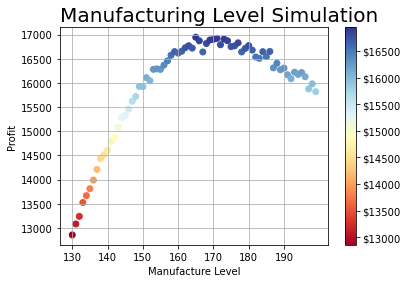

In [11]:
run_program()

##### Running simulation with uniform distribution - Your business analyst says the forecasted demand for the earbuds will be normally distributed with mean 150 and standard deviation 20 with probability 50% and uniformly distributed between 100 to 200 with probability 50%. How many earbuds would you manufacture now?

Enter the lowest manufacturing level you want to simulate: 140
Enter the highest manufacturing level you want to simulate: 200
Enter the mean: 150
Enter the standard deviation: 20
Enter the number of demand simulations you want to run: 1000
Enter the retail price: 150
Enter the production cost: 28.5
Enter the disposal cost: 8.5
Enter the 'n' for normal distribution or 'u' for uniform distribution: u
Enter the low only for uniform distribution. Enter 0 for normal distribution:  100
Enter the high only for uniform distribution. Enter 0 for normal distribution: 200
140 units manufactured
AVG: 13520.84
STD: 1946.26
141 units manufactured
AVG: 13783.0
STD: 2000.21
142 units manufactured
AVG: 13773.39
STD: 2028.42
143 units manufactured
AVG: 13920.22
STD: 1998.55
144 units manufactured
AVG: 13989.49
STD: 2000.87
145 units manufactured
AVG: 14351.26
STD: 1997.17
146 units manufactured
AVG: 14301.02
STD: 1987.97
147 units manufactured
AVG: 14410.46
STD: 1999.82
148 units manufactured
AVG: 1457

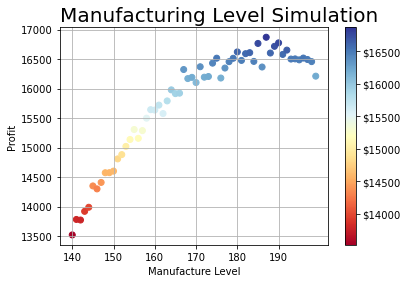

In [16]:
run_program()